In [3]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score 

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [5]:
X_test.shape 

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

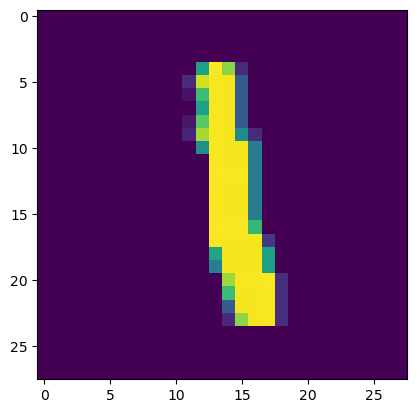

In [7]:
plt.imshow(X_train[6])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9159 - val_loss: 0.1511 - val_accuracy: 0.9551
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1203 - accuracy: 0.9641 - val_loss: 0.1101 - val_accuracy: 0.9679
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0847 - accuracy: 0.9736 - val_loss: 0.1078 - val_accuracy: 0.9691
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0969 - val_accuracy: 0.9716
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0471 - accuracy: 0.9846 - val_loss: 0.0926 - val_accuracy: 0.9743
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.1000 - val_accuracy: 0.9726
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0999 - val_accuracy:

In [14]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
accuracy_score(y_test,y_pred)

0.9777

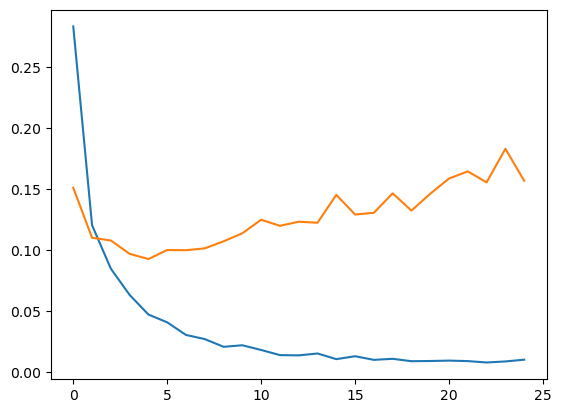

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

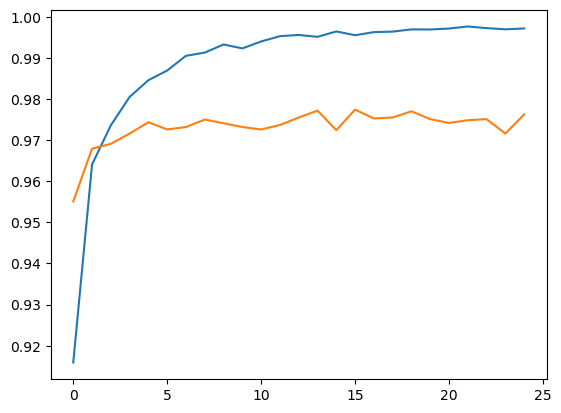

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

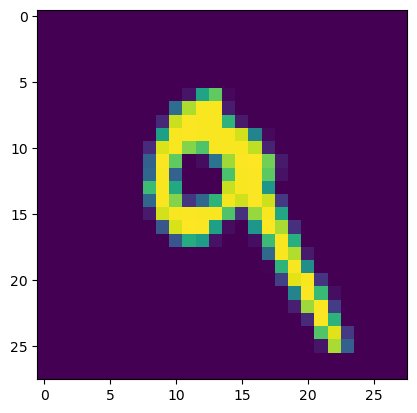

In [19]:
plt.imshow(X_test[7])

In [20]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step


array([4], dtype=int64)